In [ ]:
import os
import itertools

import cv2
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7

In [ ]:
data_dir = '/content/drive/MyDrive/Research/Dataset/kagal/MangoLeafSize'
ds_name = 'Mango Leaf Disease'

In [ ]:
def generate_data_paths(data_dir):

    filepaths = []
    labels = []

    folds = os.listdir(data_dir)

    for fold in folds:
        foldpath = os.path.join(data_dir, fold)

        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

    return filepaths, labels


filepaths, labels = generate_data_paths(data_dir)

In [ ]:
def create_df(filepaths, labels):

    Fseries = pd.Series(filepaths, name= 'filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis= 1)

    return df

df = create_df(filepaths, labels)

In [ ]:
df

,filepaths,labels
0,/content/drive/MyDrive/Research/Dataset/kagal/...,Gall_Midge
1,/content/drive/MyDrive/Research/Dataset/kagal/...,Gall_Midge
2,/content/drive/MyDrive/Research/Dataset/kagal/...,Gall_Midge
3,/content/drive/MyDrive/Research/Dataset/kagal/...,Gall_Midge
4,/content/drive/MyDrive/Research/Dataset/kagal/...,Gall_Midge
...,...,...
2995,/content/drive/MyDrive/Research/Dataset/kagal/...,Die_Back
2996,/content/drive/MyDrive/Research/Dataset/kagal/...,Die_Back
2997,/content/drive/MyDrive/Research/Dataset/kagal/...,Die_Back
2998,/content/drive/MyDrive/Research/Dataset/kagal/...,Die_Back


In [ ]:
def num_of_examples(df, name='df'):
    print(f"{name} dataset has {df.shape[0]} images.")

num_of_examples(df, ds_name)

Mango Leaf Disease dataset has 3000 images.


In [ ]:
def num_of_classes(df, name='df'):
    print(f"{name} dataset has {len(df['labels'].unique())} classes.")

num_of_classes(df, ds_name)

Mango Leaf Disease dataset has 5 classes.


In [ ]:
def classes_count(df, name='df'):

    print(f"{name} dataset: ")
    print("="*70)
    print()
    for name in df['labels'].unique():
        num_class = len(df['labels'][df['labels'] == name])
        print(f"'{name}'class has  {num_class} images. ")
        print('-'*70)

classes_count(df, ds_name)

Mango Leaf Disease dataset: 

'Gall_Midge'class has  600 images. 
----------------------------------------------------------------------
'Healthy'class has  600 images. 
----------------------------------------------------------------------
'Bacterial_Canker'class has  600 images. 
----------------------------------------------------------------------
'Anthracnose'class has  600 images. 
----------------------------------------------------------------------
'Die_Back'class has  600 images. 
----------------------------------------------------------------------


In [ ]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentage Chart'),
                        specs=[[{"type": "bar"}, {'type': 'pie'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=20),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors)),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

cat_summary_with_graph(df,'labels')

In [ ]:
def check_null_values(df, name='df'):

    num_null_vals = sum(df.isnull().sum().values)

    if not num_null_vals:
        print(f"{name} DataFrame has no null values.")

    else:
        print(f"The {name} DataFrame has {num_null_vals} null values.")
        print('-'*70)
        print('Total null values in each column:')
        print(df.isnull().sum())


check_null_values(df, ds_name)

Mango Leaf Disease DataFrame has no null values.


In [ ]:
# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.7, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123)

In [ ]:
def num_imgs(df, name='df'):
    print(f"{name} set contains {len(df)} images.")

In [ ]:
num_imgs(train_df, 'Training ')
num_imgs(valid_df, 'Validation ')
num_imgs(test_df, 'Testing ')

Training  set contains 2100 images.
Validation  set contains 450 images.
Testing  set contains 450 images.


In [ ]:
num_of_classes(train_df, "Training ")
num_of_classes(valid_df, "Validation ")
num_of_classes(test_df, "Testing ")

Training  dataset has 5 classes.
Validation  dataset has 5 classes.
Testing  dataset has 5 classes.


In [ ]:
classes_count(train_df, 'Training '+ds_name)

Training Mango Leaf Disease dataset: 

'Die_Back'class has  427 images. 
----------------------------------------------------------------------
'Gall_Midge'class has  432 images. 
----------------------------------------------------------------------
'Healthy'class has  412 images. 
----------------------------------------------------------------------
'Bacterial_Canker'class has  419 images. 
----------------------------------------------------------------------
'Anthracnose'class has  410 images. 
----------------------------------------------------------------------


In [ ]:
classes_count(valid_df, 'Validation '+ds_name)

Validation Mango Leaf Disease dataset: 

'Gall_Midge'class has  82 images. 
----------------------------------------------------------------------
'Healthy'class has  102 images. 
----------------------------------------------------------------------
'Bacterial_Canker'class has  89 images. 
----------------------------------------------------------------------
'Anthracnose'class has  88 images. 
----------------------------------------------------------------------
'Die_Back'class has  89 images. 
----------------------------------------------------------------------


In [ ]:
classes_count(test_df, 'Testing '+ds_name)

Testing Mango Leaf Disease dataset: 

'Anthracnose'class has  102 images. 
----------------------------------------------------------------------
'Healthy'class has  86 images. 
----------------------------------------------------------------------
'Bacterial_Canker'class has  92 images. 
----------------------------------------------------------------------
'Gall_Midge'class has  86 images. 
----------------------------------------------------------------------
'Die_Back'class has  84 images. 
----------------------------------------------------------------------


In [ ]:
batch_size = 40
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)


ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size


def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           brightness_range=[0.4,0.6],
                           zoom_range=0.3,
                           horizontal_flip=True,
                           vertical_flip=True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           brightness_range=[0.4,0.6],
                           zoom_range=0.3,
                           horizontal_flip=True,
                           vertical_flip=True)

train_gen = tr_gen.flow_from_dataframe(train_df,
                                       x_col = 'filepaths',
                                       y_col= 'labels',
                                       target_size = img_size,
                                       class_mode= 'categorical',
                                       color_mode= 'rgb',
                                       shuffle= True,
                                       batch_size=batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df,
                                       x_col= 'filepaths',
                                       y_col= 'labels',
                                       target_size= img_size,
                                       class_mode= 'categorical',
                                       color_mode= 'rgb',
                                       shuffle= True,
                                       batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe(test_df,
                                      x_col= 'filepaths',
                                      y_col= 'labels',
                                      target_size= img_size,
                                      class_mode= 'categorical',
                                      color_mode= 'rgb',
                                      shuffle= False,
                                      batch_size= test_batch_size)

Found 2100 validated image filenames belonging to 5 classes.
Found 450 validated image filenames belonging to 5 classes.
Found 450 validated image filenames belonging to 5 classes.


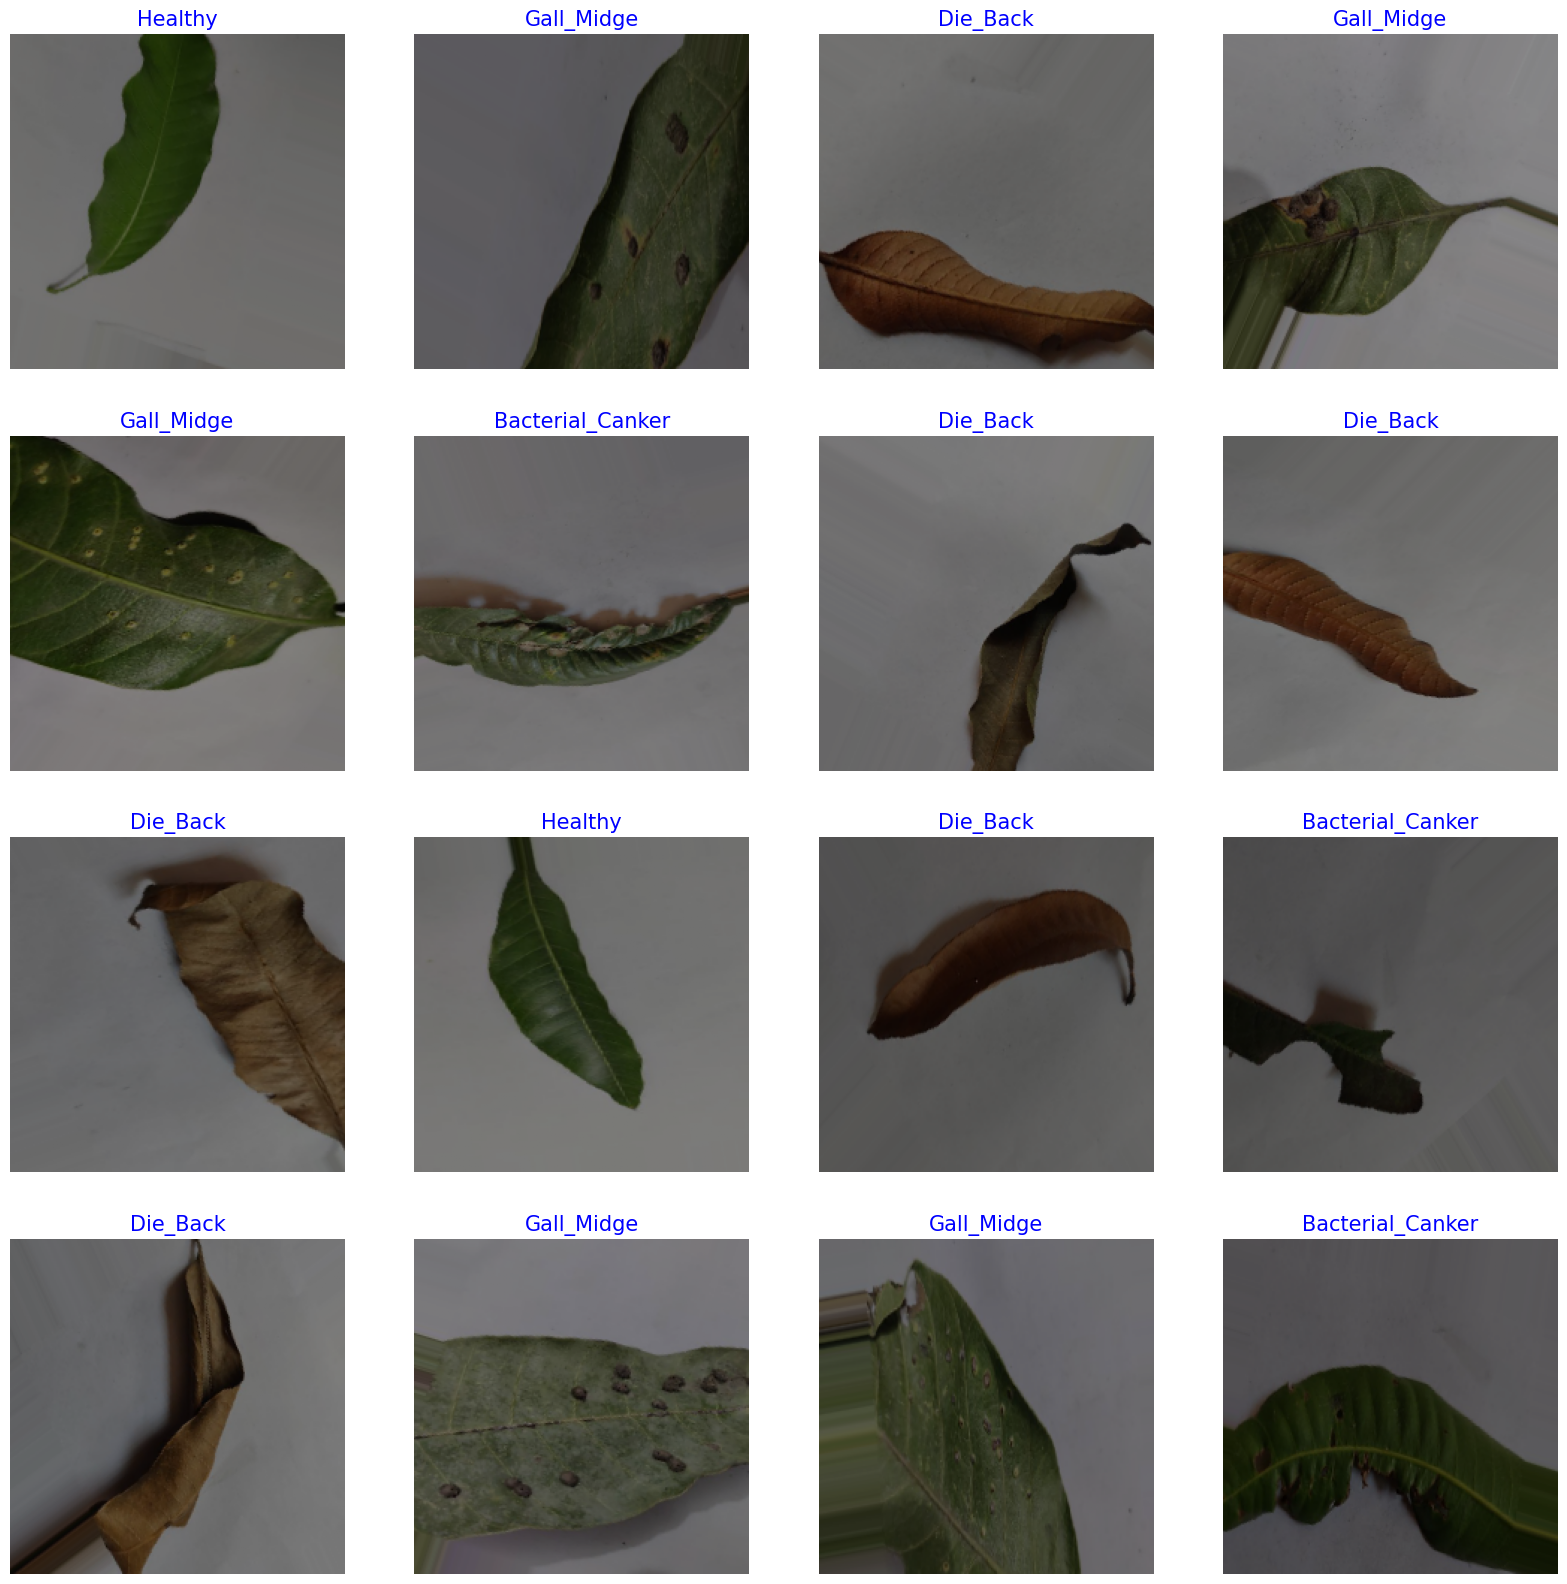

In [ ]:
g_dict = train_gen.class_indices

classes = list(g_dict.keys())

images, labels = next(train_gen)

plt.figure(figsize=(20, 20))

for i in range(16):

    plt.subplot(4, 4, i + 1)

    image = images[i] / 255

    plt.imshow(image)

    index = np.argmax(labels[i])

    class_name = classes[index]

    plt.title(class_name, color='blue', fontsize=15)

    plt.axis('off')

plt.show()

In [ ]:
img_size = (224, 224)

channels = 3

img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_gen.class_indices.keys()))

base_model = tf.keras.applications.efficientnet.EfficientNetB7(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

base_model.trainable = False

model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(128, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation='softmax')
])

model.compile(Adamax(learning_rate=0.002), loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

258076736/258076736 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 2560)              64097687  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 2560)              10240     
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               327808    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                       

In [ ]:
base_model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

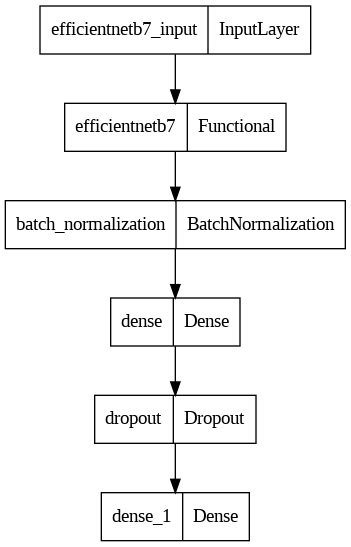

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True,
                               mode='min',
                              )

In [ ]:
batch_size = 16
epochs = 10

history = model.fit(x=train_gen,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = valid_gen,
                    validation_steps = None,
                    shuffle = False,
                    batch_size = batch_size,
                    callbacks = [early_stopping])

Epoch 1/10
53/53 [==============================] - 1588s 29s/step - loss: 5.1653 - accuracy: 0.7195 - val_loss: 4.2440 - val_accuracy: 0.8711
Epoch 2/10
53/53 [==============================] - 1433s 27s/step - loss: 3.8829 - accuracy: 0.8338 - val_loss: 3.3756 - val_accuracy: 0.8956
Epoch 3/10
53/53 [==============================] - 1532s 29s/step - loss: 3.2197 - accuracy: 0.8624 - val_loss: 2.7594 - val_accuracy: 0.9400
Epoch 4/10
53/53 [==============================] - 1403s 27s/step - loss: 2.7029 - accuracy: 0.8924 - val_loss: 2.3782 - val_accuracy: 0.9244
Epoch 5/10
53/53 [==============================] - 1443s 27s/step - loss: 2.3050 - accuracy: 0.8929 - val_loss: 2.0250 - val_accuracy: 0.9311
Epoch 6/10
53/53 [==============================] - 1419s 27s/step - loss: 1.9907 - accuracy: 0.8971 - val_loss: 1.7455 - val_accuracy: 0.9267
Epoch 7/10
53/53 [==============================] - 1406s 27s/step - loss: 1.7336 - accuracy: 0.9010 - val_loss: 1.5263 - val_accuracy: 0.9333

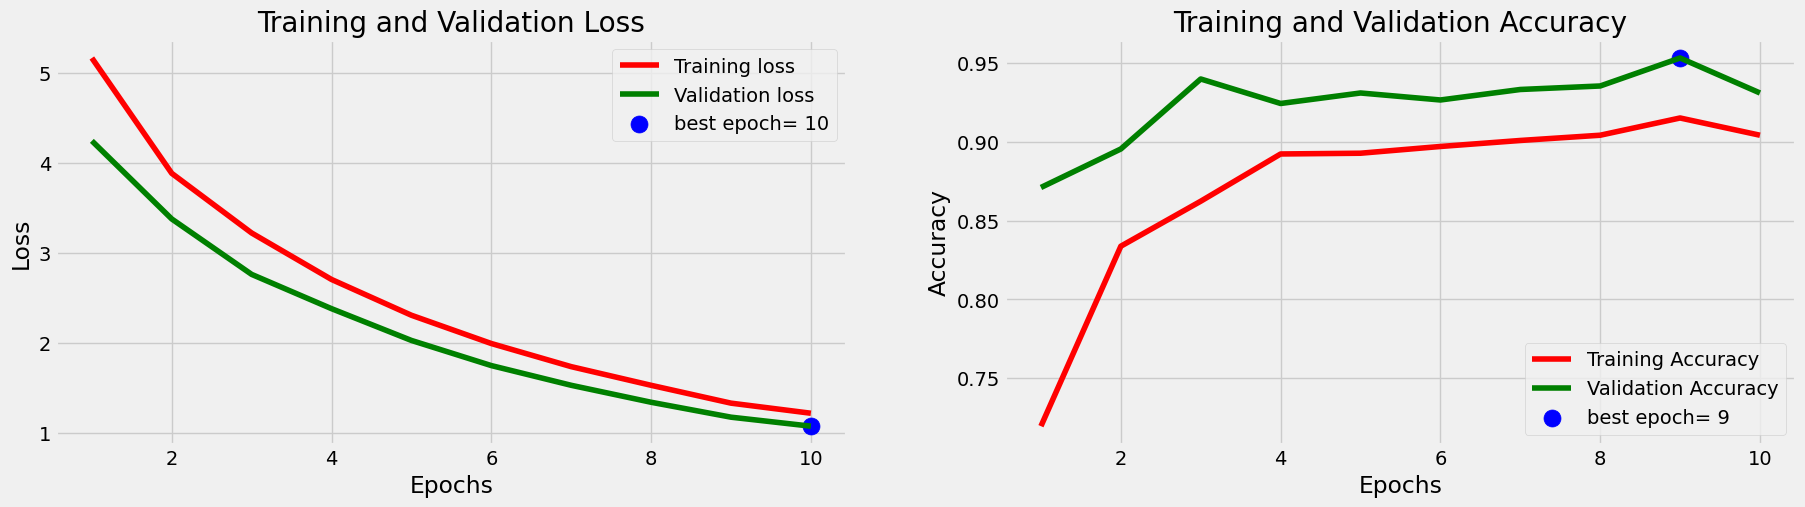

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'


plt.figure(figsize= (20, 5))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuary: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

6/6 [==============================] - 264s 43s/step - loss: 1.0611 - accuracy: 0.9422
Train Loss:  1.0466209650039673
Train Accuary:  0.9541666507720947
--------------------
Validation Loss:  1.0862014293670654
Validation Accuracy:  0.9375
--------------------
Test Loss:  1.0610556602478027
Test Accuracy:  0.9422222375869751


In [ ]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

6/6 [==============================] - 286s 46s/step


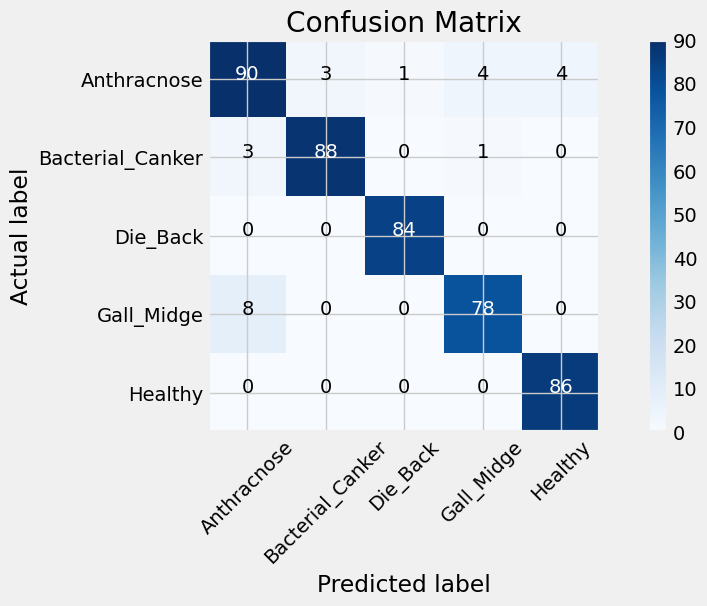

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())


cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 6))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                  precision    recall  f1-score   support

     Anthracnose       0.89      0.88      0.89       102
Bacterial_Canker       0.97      0.96      0.96        92
        Die_Back       0.99      1.00      0.99        84
      Gall_Midge       0.94      0.91      0.92        86
         Healthy       0.96      1.00      0.98        86

        accuracy                           0.95       450
       macro avg       0.95      0.95      0.95       450
    weighted avg       0.95      0.95      0.95       450



In [ ]:
model.save_weights('my_model_weights.h5')

1/1 [==============================] - 9s 9s/step


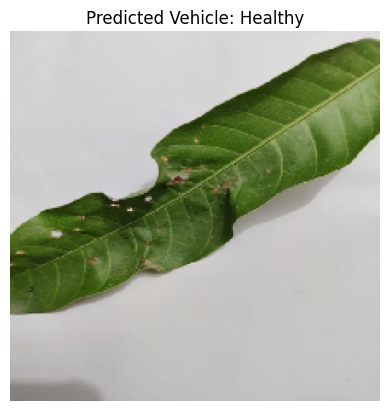

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_and_display(image_path, model, class_labels):

    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)

    predicted_class_label = class_labels[predicted_class_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Vehicle: {predicted_class_label}")
    plt.show()


model.load_weights('my_model_weights.h5')


class_labels = list(train_gen.class_indices.keys())


image_path_to_test = '/content/drive/MyDrive/Research/Dataset/kagal/MangoLeafSize/Anthracnose/IMG_20240506_204313.jpg'
predict_and_display(image_path_to_test, model, class_labels)

In [ ]:
class_labels

['Anthracnose', 'Bacterial_Canker', 'Die_Back', 'Gall_Midge', 'Healthy']

1/1 [==============================] - 1s 797ms/step


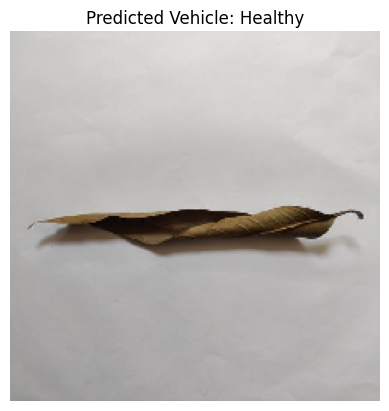

In [ ]:
image_path_to_test = '/content/drive/MyDrive/Research/Dataset/kagal/MangoLeafSize/Die_Back/IMG_20240504_125928.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 497ms/step


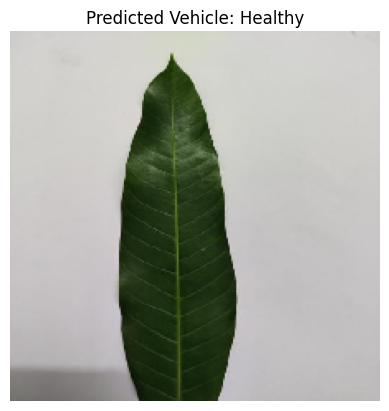

In [ ]:
image_path_to_test = '/content/drive/MyDrive/Research/Dataset/kagal/MangoLeafSize/Healthy/IMG_20240504_210521.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 1s 802ms/step


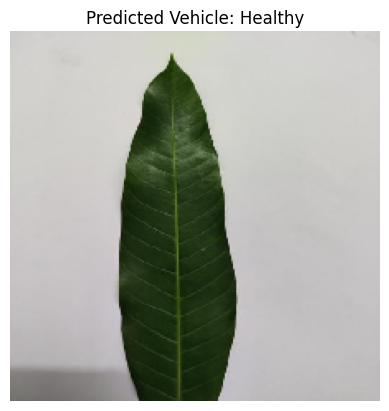

In [ ]:
image_path_to_test = '/content/drive/MyDrive/Research/Dataset/kagal/MangoLeafSize/Healthy/IMG_20240504_210521.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 2s 2s/step


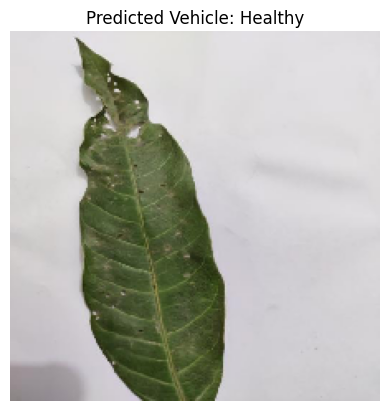

In [ ]:
image_path_to_test = '/content/drive/MyDrive/Research/Dataset/kagal/MangoLeafSize/Anthracnose/IMG_20240506_204013.jpg'
predict_and_display(image_path_to_test, model, class_labels)